In [10]:
import pandas as pd
import numpy as np

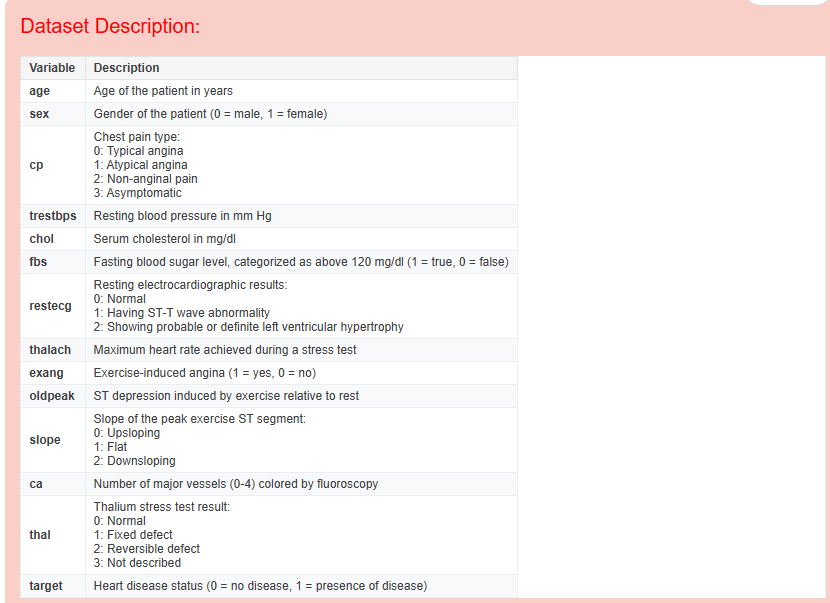

In [11]:
df_heart = pd.read_csv('heart.csv')
df_heart

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  target   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Tách các đặc trưng số và mục lục(Categories)

In [13]:
numeric_col = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
numeric_col


['age', 'restbps', 'chol', 'thalach', 'oldpeak']

In [14]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
df_numeric = df_heart[numeric_col]
df_numeric

,age,restbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [16]:
df_categories = df_heart[categories_col].astype('object')
df_categories.dtypes

sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
target     object
dtype: object

In [17]:
# Chuyển đổi các cột phân loại về dạng nhãn ý nghĩa
df_heart['sex'] = df_heart['sex'].map({1: 'Male', 0: 'Female'})
df_heart['cp'] = df_heart['cp'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'})
df_heart['fbs'] = df_heart['fbs'].map({1: '>120 mg/dl', 0: '<=120 mg/dl'})
df_heart['restecg'] = df_heart['restecg'].map({0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'})
df_heart['exang'] = df_heart['exang'].map({1: 'Yes', 0: 'No'})
df_heart['slope'] = df_heart['slope'].map({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
df_heart['thal'] = df_heart['thal'].map({0: 'None', 1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'})
df_heart['target'] = df_heart['target'].map({1: 'Has Disease', 0: 'No Disease'})



df_heart.head(50)

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,>120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,Has Disease
1,37,Male,Non-anginal Pain,130,250,<=120 mg/dl,ST-T Wave Abnormality,187,No,3.5,Upsloping,0,Fixed Defect,Has Disease
2,41,Female,Atypical Angina,130,204,<=120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Has Disease
3,56,Male,Atypical Angina,120,236,<=120 mg/dl,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Has Disease
4,57,Female,Typical Angina,120,354,<=120 mg/dl,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Has Disease
5,57,Male,Typical Angina,140,192,<=120 mg/dl,ST-T Wave Abnormality,148,No,0.4,Flat,0,Normal,Has Disease
6,56,Female,Atypical Angina,140,294,<=120 mg/dl,Normal,153,No,1.3,Flat,0,Fixed Defect,Has Disease
7,44,Male,Atypical Angina,120,263,<=120 mg/dl,ST-T Wave Abnormality,173,No,0.0,Downsloping,0,Reversible Defect,Has Disease
8,52,Male,Non-anginal Pain,172,199,>120 mg/dl,ST-T Wave Abnormality,162,No,0.5,Downsloping,0,Reversible Defect,Has Disease
9,57,Male,Non-anginal Pain,150,168,<=120 mg/dl,ST-T Wave Abnormality,174,No,1.6,Downsloping,0,Fixed Defect,Has Disease
